# EDA

#Bike Details Dataset

In [88]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [89]:
df = pd.read_csv("/content/BIKE DETAILS.csv") # uplading  bike details


In [ ]:
df.head()

,name,selling_price,year,seller_type,owner,km_driven,ex_showroom_price
0,Royal Enfield Classic 350,175000,2019,Individual,1st owner,350,NaN
1,Honda Dio,45000,2017,Individual,1st owner,5650,NaN
2,Royal Enfield Classic Gunmetal Grey,150000,2018,Individual,1st owner,12000,148114.0
3,Yamaha Fazer FI V 2.0 [2016-2018],65000,2015,Individual,1st owner,23000,89643.0
4,Yamaha SZ [2013-2014],20000,2011,Individual,2nd owner,21000,NaN


In [ ]:
df.tail()

,name,selling_price,year,seller_type,owner,km_driven,ex_showroom_price
1056,Activa 3g,17000,2010,Individual,1st owner,500000,52000.0
1057,Honda CB twister,16000,2012,Individual,1st owner,33000,51000.0
1058,Bajaj Discover 125,15000,2013,Individual,2nd owner,35000,57000.0
1059,Honda CB Shine,12000,2009,Individual,1st owner,53000,58000.0
1060,Bajaj Pulsar 150,10000,2008,Individual,1st owner,92233,75000.0


In [ ]:
df.isnull().sum() # Checking null values


,0
name,0
selling_price,0
year,0
seller_type,0
owner,0
km_driven,0
ex_showroom_price,435


In [ ]:
df.dtypes


,0
name,object
selling_price,int64
year,int64
seller_type,object
owner,object
km_driven,int64
ex_showroom_price,float64


In [91]:
# Show column names
print("Column names:", df.columns.tolist())

Column names: ['name', 'selling_price', 'year', 'seller_type', 'owner', 'km_driven', 'ex_showroom_price']


In [92]:
# Strip whitespaces from column names
df.columns = df.columns.str.strip()

In [93]:
# Check for missing values
print("Missing values in each column:")
print(df.isnull().sum())

Missing values in each column:
name                   0
selling_price          0
year                   0
seller_type            0
owner                  0
km_driven              0
ex_showroom_price    435
dtype: int64


In [94]:
# Drop rows where all elements are NaN
df.dropna(how='all', inplace=True)

In [95]:
# Check for duplicate rows
duplicates = df.duplicated().sum()
print("Duplicate rows found:", duplicates)
if duplicates > 0:
    df.drop_duplicates(inplace=True)
    print("Duplicate rows dropped.")

Duplicate rows found: 6
Duplicate rows dropped.


In [96]:
# Final shape after cleaning
print("Final shape after cleaning:", df.shape)

Final shape after cleaning: (1055, 7)


In [ ]:
#1. What is the median selling price for bikes in the dataset?


# Minimum selling price
min_price = df['selling_price'].min()

# Maximum selling price
max_price = df['selling_price'].max()

# Range calculation
price_range = max_price - min_price

print(f"Minimum Selling Price: ₹{min_price}")
print(f"Maximum Selling Price: ₹{max_price}")
print(f"Range of Selling Prices: ₹{price_range}")


Minimum Selling Price: ₹5000
Maximum Selling Price: ₹760000
Range of Selling Prices: ₹755000


In [ ]:
#2. What is the median selling price for bikes in the dataset?
median_price = df['selling_price'].median()

print(f"Median Selling Price: ₹{median_price}")


Median Selling Price: ₹45000.0


In [ ]:
#3. What is the most common seller type?
# Most common seller type and its count
seller_counts = df['seller_type'].value_counts()

most_common_seller = seller_counts.idxmax()
most_common_seller_count = seller_counts.max()

print(f"Most Common Seller Type: {most_common_seller} (Count: {most_common_seller_count})")


Most Common Seller Type: Individual (Count: 1055)


In [ ]:
#4. How many bikes have driven more than 50,000 kilometers?
high_km_count = df[df['km_driven'] > 50000].shape[0]
print(f"Bikes with more than 50,000 km driven: {high_km_count}")

Bikes with more than 50,000 km driven: 170


In [ ]:
#5. What is the average km_driven value for each ownership type?
avg_km_by_owner = df.groupby('owner')['km_driven'].mean()
print(avg_km_by_owner)

owner
1st owner     32816.583333
2nd owner     39288.991870
3rd owner     33292.181818
4th owner    311500.000000
Name: km_driven, dtype: float64


In [ ]:
#6. What proportion of bikes are from the year 2015 or older?
old_bikes_ratio = (df['year'] <= 2015).mean()
print(f"Proportion of bikes from 2015 or older: {old_bikes_ratio:.2%}")

Proportion of bikes from 2015 or older: 56.64%


In [ ]:
#7. What is the trend of missing values across the dataset?
missing_values = df.isnull().sum()
print(missing_values)

name                   0
selling_price          0
year                   0
seller_type            0
owner                  0
km_driven              0
ex_showroom_price    435
dtype: int64


In [ ]:
#8. What is the highest ex_showroom_price recorded, and for which bike?
highest_price_row = df.loc[df['ex_showroom_price'].idxmax()]
print(f"Bike: {highest_price_row['name']}, Price: ₹{highest_price_row['ex_showroom_price']}")

Bike: Harley-Davidson Street Bob, Price: ₹1278000.0


In [ ]:
#9. What is the total number of bikes listed by each seller type?
bikes_by_seller = df['seller_type'].value_counts()
print(bikes_by_seller)

seller_type
Individual    1055
Dealer           6
Name: count, dtype: int64


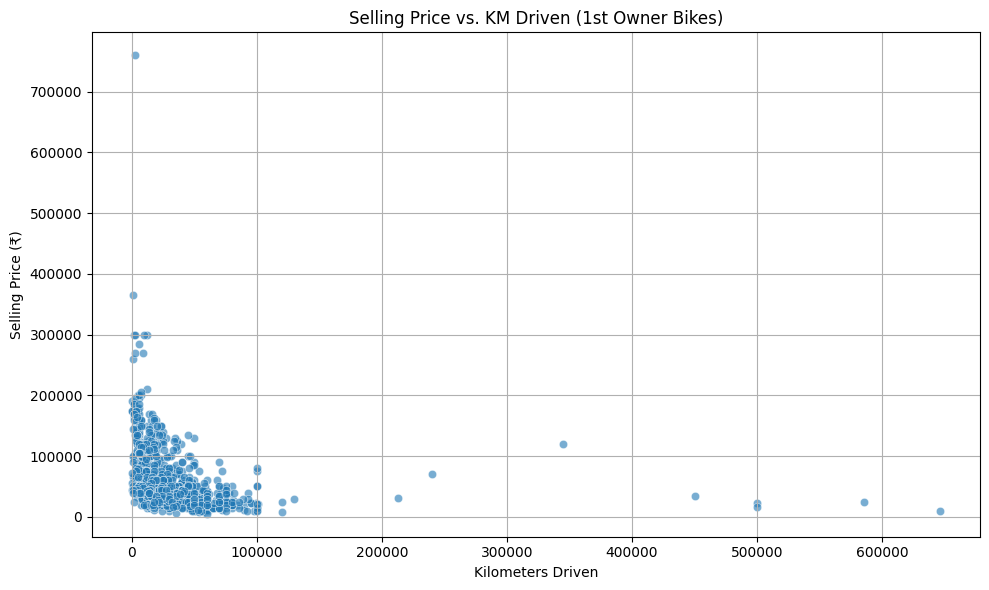

In [ ]:
#10. What is the relationship between selling price and km_driven for first-owner bikes?

first_owner_bikes = df[df['owner'] == '1st owner']

plt.figure(figsize=(10, 6))
sns.scatterplot(data=first_owner_bikes, x='km_driven', y='selling_price', alpha=0.6)

plt.title('Selling Price vs. KM Driven (1st Owner Bikes)')
plt.xlabel('Kilometers Driven')
plt.ylabel('Selling Price (₹)')
plt.grid(True)
plt.tight_layout()
plt.show()


In [ ]:
#11. Identify and remove outliers in the km_driven column using the IQR method ?
Q1 = df['km_driven'].quantile(0.25)
Q3 = df['km_driven'].quantile(0.75)
IQR = Q3 - Q1
lower = Q1 - 1.5 * IQR
upper = Q3 + 1.5 * IQR
df_no_outliers = df[(df['km_driven'] >= lower) & (df['km_driven'] <= upper)]
print(f"Removed {df.shape[0] - df_no_outliers.shape[0]} outliers.")


Removed 39 outliers.


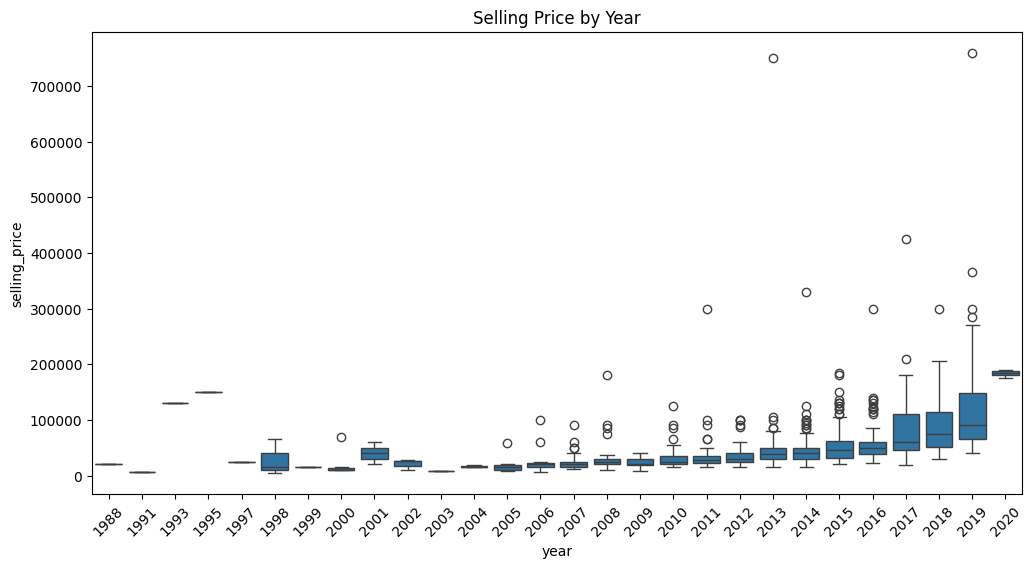

In [ ]:
#12. Perform a bivariate analysis to visualize the relationship between year and selling_price ?
plt.figure(figsize=(12, 6))
sns.boxplot(data=df_no_outliers, x='year', y='selling_price')
plt.xticks(rotation=45)
plt.title('Selling Price by Year')
plt.show()



In [ ]:
#13. What is the average depreciation in selling price based on the bike's age (current year - manufacturing year) ?
df['age'] = 2025 - df['year']
avg_depreciation = df.groupby('age')['selling_price'].mean().sort_index()
print(avg_depreciation)


age
5     183333.333333
6     119689.511628
7      87660.374046
8      78894.736842
9      58469.018692
10     56500.000000
11     48668.131868
12     51136.986301
13     35748.400000
14     35655.721311
15     31793.333333
16     22267.857143
17     34289.285714
18     24927.586207
19     23380.000000
20     16978.571429
21     15100.000000
22      8000.000000
23     20666.666667
24     40000.000000
25     20833.333333
26     15000.000000
27     28333.333333
28     17500.000000
30    150000.000000
32    130000.000000
34      6000.000000
37     20000.000000
Name: selling_price, dtype: float64


In [ ]:
#14. Which bike names are priced significantly above the average price for their manufacturing year?
yearly_avg = df.groupby('year')['selling_price'].mean()
df['above_avg'] = df.apply(lambda row: row['selling_price'] > yearly_avg[row['year']] * 1.5, axis=1)
print(df[df['above_avg']][['name', 'year', 'selling_price']])


                                     name  year  selling_price
2     Royal Enfield Classic Gunmetal Grey  2018         150000
7    Royal Enfield Bullet 350 [2007-2011]  2008         180000
13                          Yamaha YZF R3  2019         365000
18    Royal Enfield Classic Gunmetal Grey  2018         150000
23                          Jawa Standard  2019         180000
..                                    ...   ...            ...
979             Royal Enfield Thunder 500  2015         105000
981             Royal Enfield Thunder 350  2013         105000
983             Royal Enfield Classic 350  2015         100000
984             Royal Enfield Classic 500  2014          95000
985             Royal Enfield Classic 500  2011          90000

[157 rows x 3 columns]


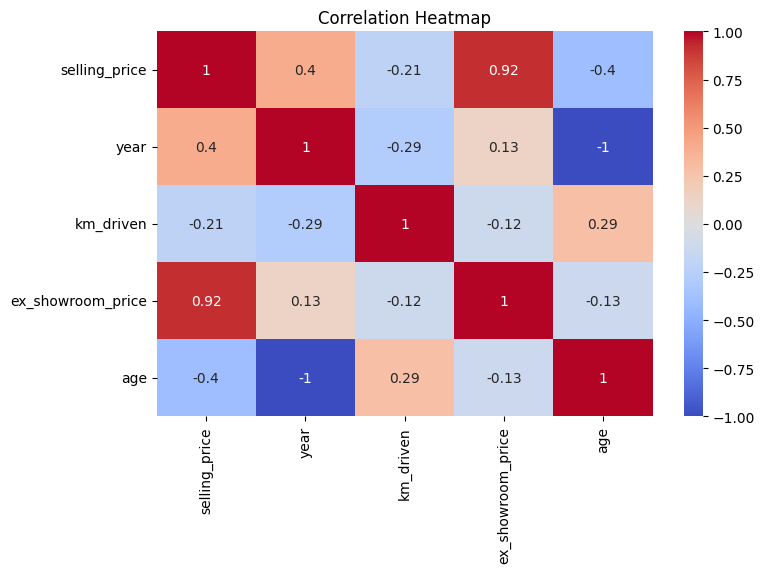

In [ ]:
#15. Develop a correlation matrix for numeric columns and visualize it using a heatmap.
plt.figure(figsize=(8, 5))
sns.heatmap(df.select_dtypes(include='number').corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()


#Car Sale Dataset

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [4]:
car_df = pd.read_csv('/content/Car Sale.csv')

In [ ]:
# Clean column names
df = pd.read_csv("Car Sale.csv").columns = car_df.columns.str.strip().str.replace(" ", "_")

In [ ]:
# Convert 'Date' to datetime
car_df['Date'] = pd.to_datetime(car_df['Date'], errors='coerce')

In [ ]:
# Clean 'Engine' column
car_df['Engine'] = car_df['Engine'].astype(str).str.replace("Â", "", regex=False).str.strip()


In [ ]:
car_df.head()

,Car_id,Date,Customer_Name,Gender,Annual_Income,Dealer_Name,Company,Model,Engine,Transmission,Color,Price_($),Dealer_No,Body_Style,Phone,Dealer_Region
0,C_CND_000001,2022-01-02,Geraldine,Male,13500,Buddy Storbeck's Diesel Service Inc,Ford,Expedition,Double Overhead Camshaft,Auto,Black,26000,06457-3834,SUV,8264678,Middletown
1,C_CND_000002,2022-01-02,Gia,Male,1480000,C & M Motors Inc,Dodge,Durango,Double Overhead Camshaft,Auto,Black,19000,60504-7114,SUV,6848189,Aurora
2,C_CND_000003,2022-01-02,Gianna,Male,1035000,Capitol KIA,Cadillac,Eldorado,Overhead Camshaft,Manual,Red,31500,38701-8047,Passenger,7298798,Greenville
3,C_CND_000004,2022-01-02,Giselle,Male,13500,Chrysler of Tri-Cities,Toyota,Celica,Overhead Camshaft,Manual,Pale White,14000,99301-3882,SUV,6257557,Pasco
4,C_CND_000005,2022-01-02,Grace,Male,1465000,Chrysler Plymouth,Acura,TL,Double Overhead Camshaft,Auto,Red,24500,53546-9427,Hatchback,7081483,Janesville


Average selling price by dealer:
                         Dealer_Name     Price ($)
0                          U-Haul CO  28769.919006
1                      Classic Chevy  28602.014446
2               Rabun Used Car Sales  28527.536177
3                    Iceberg Rentals  28522.958533
4              Enterprise Rent A Car  28312.580800
5  Scrivener Performance Engineering  28297.371589
6         Gartner Buick Hyundai Saab  28247.621019
7                   Saab-Belle Dodge  28190.139888
8                        Capitol KIA  28189.703822
9                      Race Car Help  28163.372706


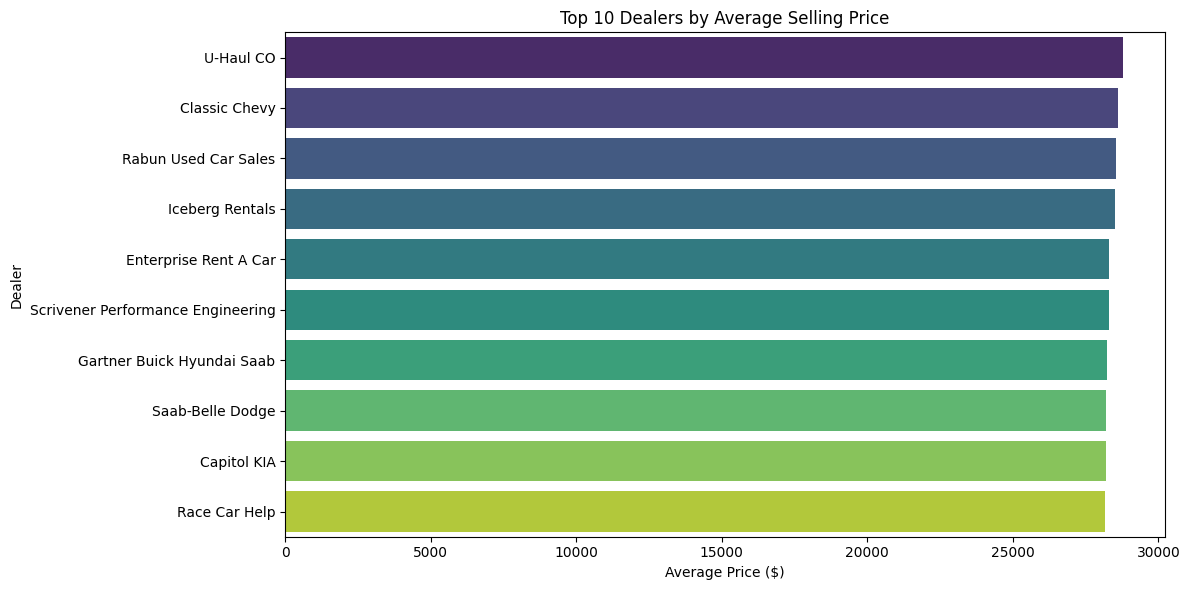

In [8]:
#1. What is the average selling price of cars for each dealer, and how does it compare across different dealers?
avg_price_by_dealer = car_df.groupby('Dealer_Name')['Price ($)'].mean().sort_values(ascending=False).reset_index()
print("Average selling price by dealer:")
print(avg_price_by_dealer.head(10))

plt.figure(figsize=(12, 6))
sns.barplot(data=avg_price_by_dealer.head(10), x='Price ($)', y='Dealer_Name', palette='viridis')
plt.title('Top 10 Dealers by Average Selling Price')
plt.xlabel('Average Price ($)')
plt.ylabel('Dealer')
plt.tight_layout()
plt.show()



Top 10 car brands with highest price variation:
    Company     Price ($)
0   Lincoln  19658.050211
1      Saab  19653.740089
2  Cadillac  19517.120220
3  Plymouth  19065.997338
4     Lexus  17852.923492
5     Buick  17142.232626
6   Mercury  16445.172195
7    Nissan  16214.264017
8    Saturn  15990.223671
9      Ford  15849.090227


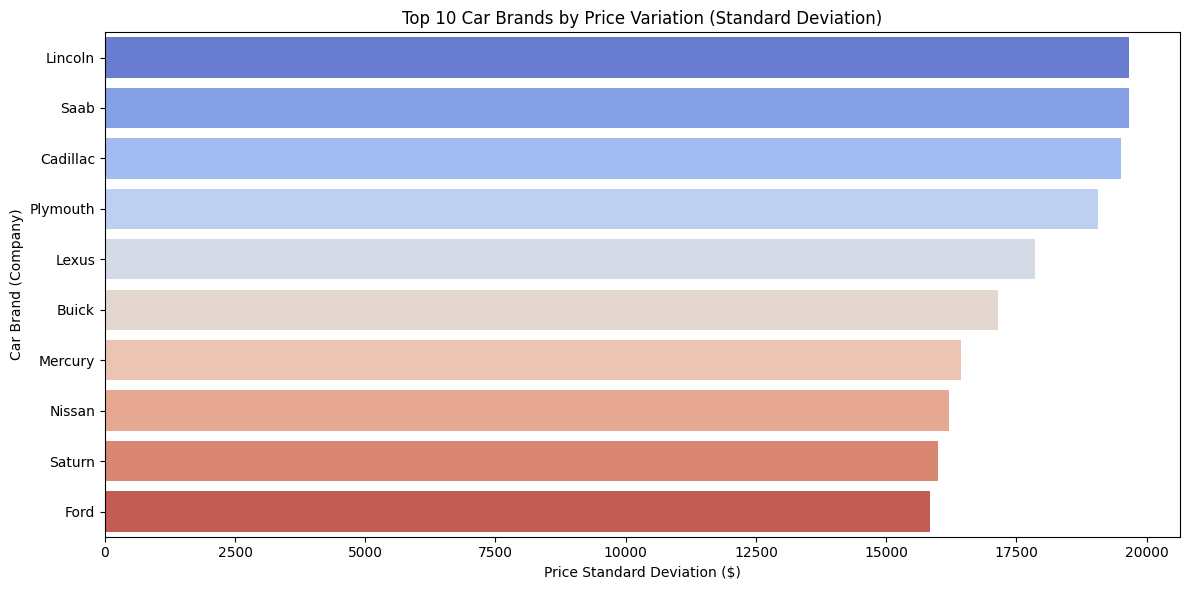

In [9]:
#2. Which car brand (Company) has the highest variation in prices, and what does this tell us about the pricing trends?
company_price_variation = car_df.groupby("Company")["Price ($)"].std().sort_values(ascending=False).reset_index()
print("Top 10 car brands with highest price variation:")
print(company_price_variation.head(10))

plt.figure(figsize=(12, 6))
sns.barplot(x="Price ($)", y="Company", data=company_price_variation.head(10), palette="coolwarm")
plt.title("Top 10 Car Brands by Price Variation (Standard Deviation)")
plt.xlabel("Price Standard Deviation ($)")
plt.ylabel("Car Brand (Company)")
plt.tight_layout()
plt.show()


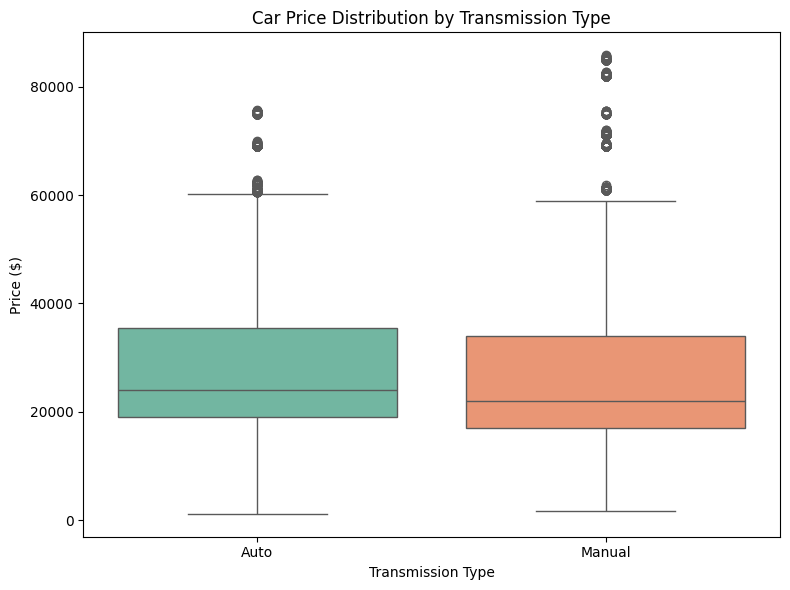

In [11]:
#3. What is the distribution of car prices for each transmission type, and how do the interquartile ranges compare?
plt.figure(figsize=(8, 6))
sns.boxplot(data=car_df, x='Transmission', y='Price ($)', palette='Set2')
plt.title('Car Price Distribution by Transmission Type')
plt.xlabel('Transmission Type')
plt.ylabel('Price ($)')
plt.tight_layout()
plt.show()


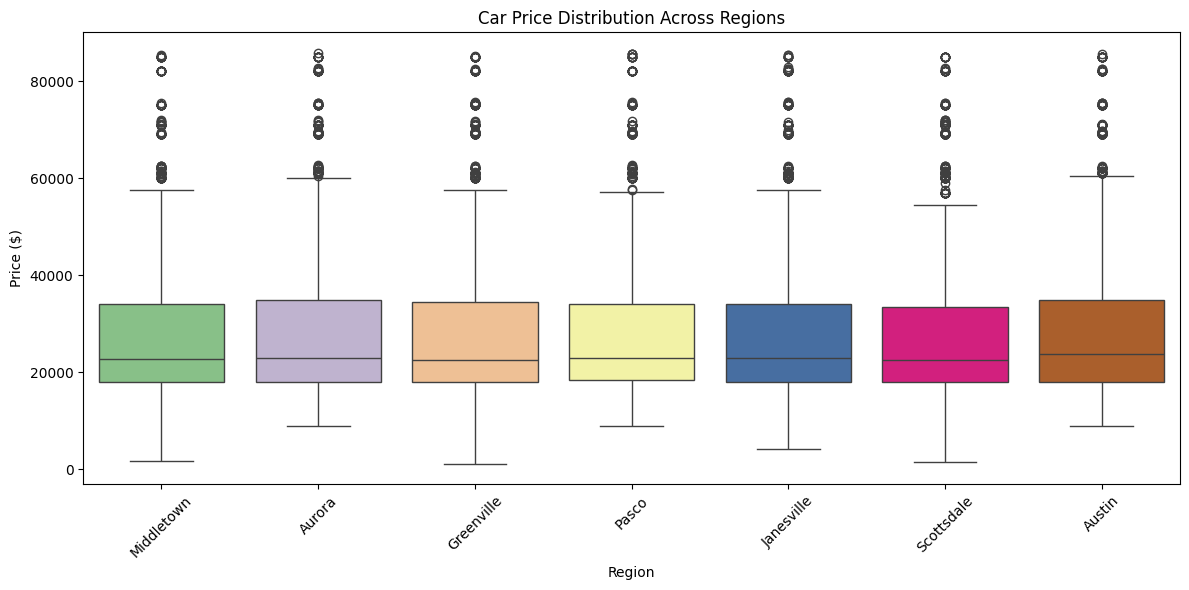

In [12]:
#4. What is the distribution of car prices across different regions?
plt.figure(figsize=(12, 6))
sns.boxplot(data=car_df, x='Dealer_Region', y='Price ($)', palette='Accent')
plt.xticks(rotation=45)
plt.title('Car Price Distribution Across Regions')
plt.xlabel('Region')
plt.ylabel('Price ($)')
plt.tight_layout()
plt.show()


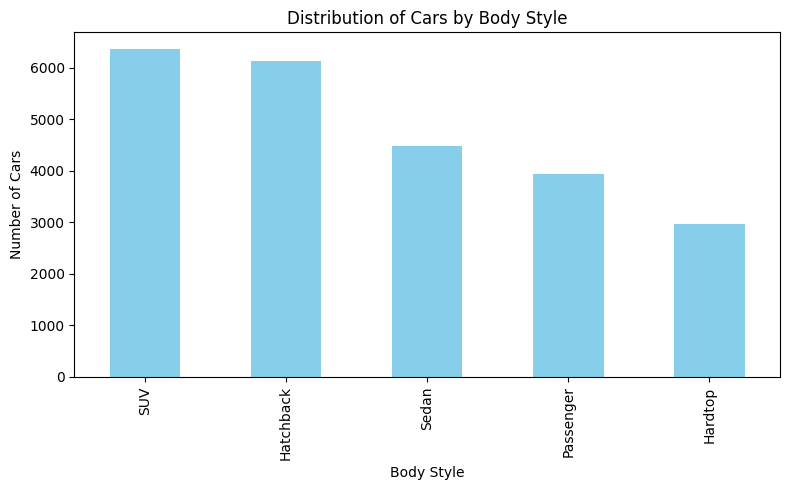

In [13]:
#5. What is the distribution of cars based on body styles?
plt.figure(figsize=(8, 5))
car_df['Body Style'].value_counts().plot(kind='bar', color='skyblue')
plt.title('Distribution of Cars by Body Style')
plt.xlabel('Body Style')
plt.ylabel('Number of Cars')
plt.tight_layout()
plt.show()


In [14]:
#6. How does the average selling price of cars vary by customer gender and annual income?
avg_price_gender_income = car_df.groupby('Gender')[['Annual Income', 'Price ($)']].mean().reset_index()
print("Average price and income by gender:")
print(avg_price_gender_income)


Average price and income by gender:
   Gender  Annual Income     Price ($)
0  Female  755973.021339  28277.265270
1    Male  851184.044207  28039.429407


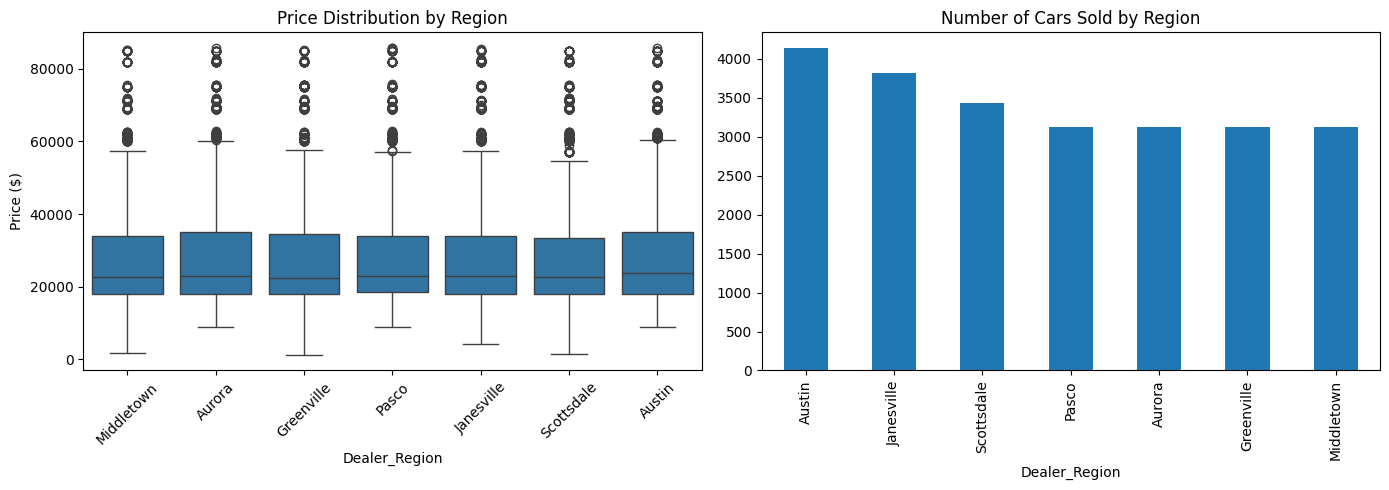

In [16]:
#7. What is the distribution of car prices by region, and how does the number of cars sold vary by region?
fig, ax = plt.subplots(1, 2, figsize=(14, 5))

sns.boxplot(data=car_df, x='Dealer_Region', y='Price ($)', ax=ax[0])
ax[0].set_title('Price Distribution by Region')
ax[0].tick_params(axis='x', rotation=45)

car_df['Dealer_Region'].value_counts().plot(kind='bar', ax=ax[1])
ax[1].set_title('Number of Cars Sold by Region')
plt.tight_layout()
plt.show()



Average price by engine type:
                      Engine     Price ($)
0  DoubleÂ Overhead Camshaft  28248.525972
1          Overhead Camshaft  27914.710631


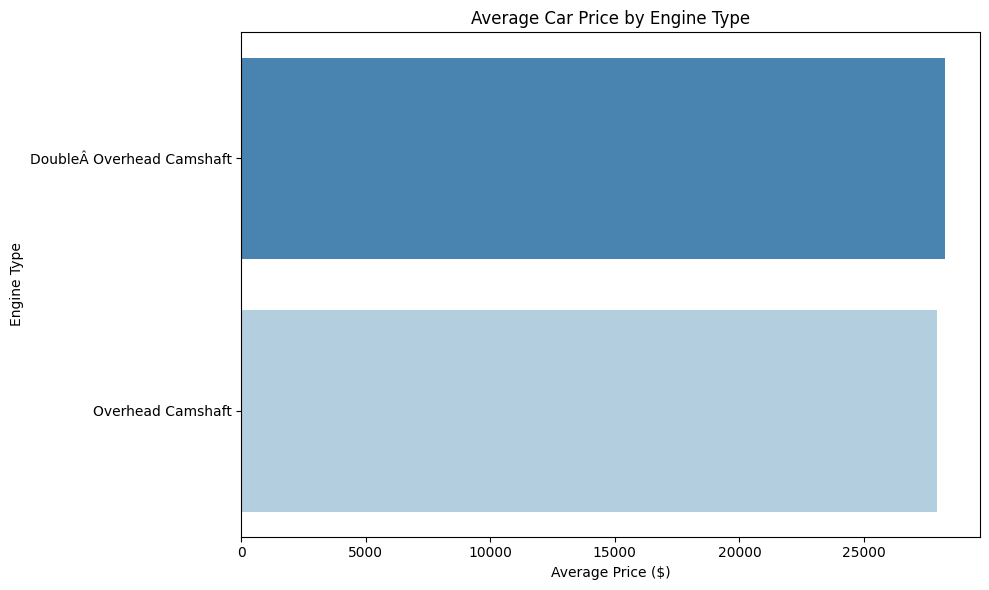

In [17]:
#8.  How does the average car price differ between cars with different engine sizes?
avg_price_by_engine = car_df.groupby('Engine')['Price ($)'].mean().sort_values(ascending=False).reset_index()
print("Average price by engine type:")
print(avg_price_by_engine)

plt.figure(figsize=(10, 6))
sns.barplot(data=avg_price_by_engine, x='Price ($)', y='Engine', palette='Blues_r')
plt.title('Average Car Price by Engine Type')
plt.xlabel('Average Price ($)')
plt.ylabel('Engine Type')
plt.tight_layout()
plt.show()













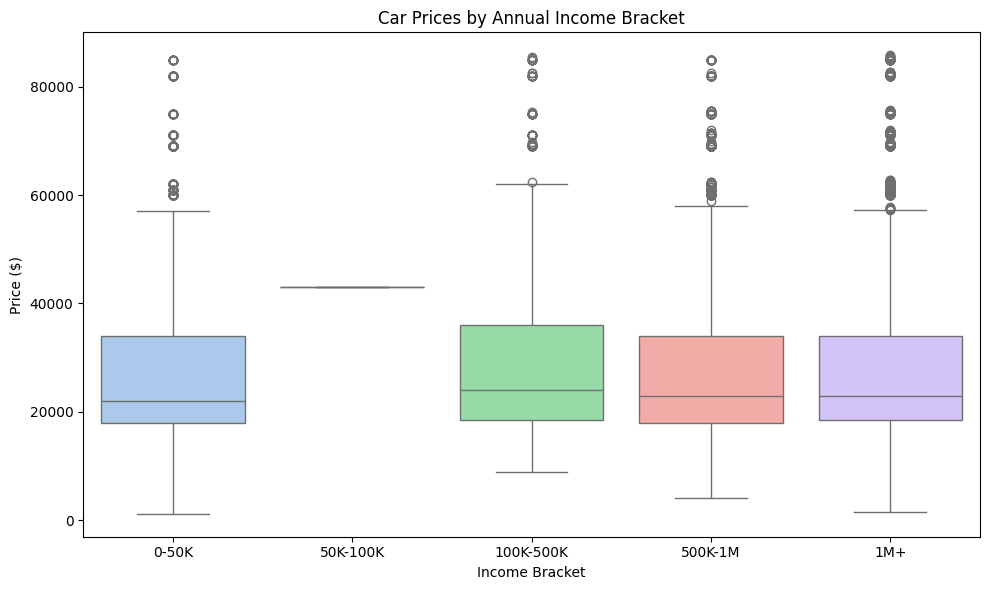

In [18]:
#9. How do car prices vary based on the customer’s annual income bracket?
bins = [0, 50000, 100000, 500000, 1000000, car_df['Annual Income'].max()]
labels = ['0-50K', '50K-100K', '100K-500K', '500K-1M', '1M+']
car_df['Income Bracket'] = pd.cut(car_df['Annual Income'], bins=bins, labels=labels)

plt.figure(figsize=(10, 6))
sns.boxplot(data=car_df, x='Income Bracket', y='Price ($)', palette='pastel')
plt.title('Car Prices by Annual Income Bracket')
plt.xlabel('Income Bracket')
plt.ylabel('Price ($)')
plt.tight_layout()
plt.show()






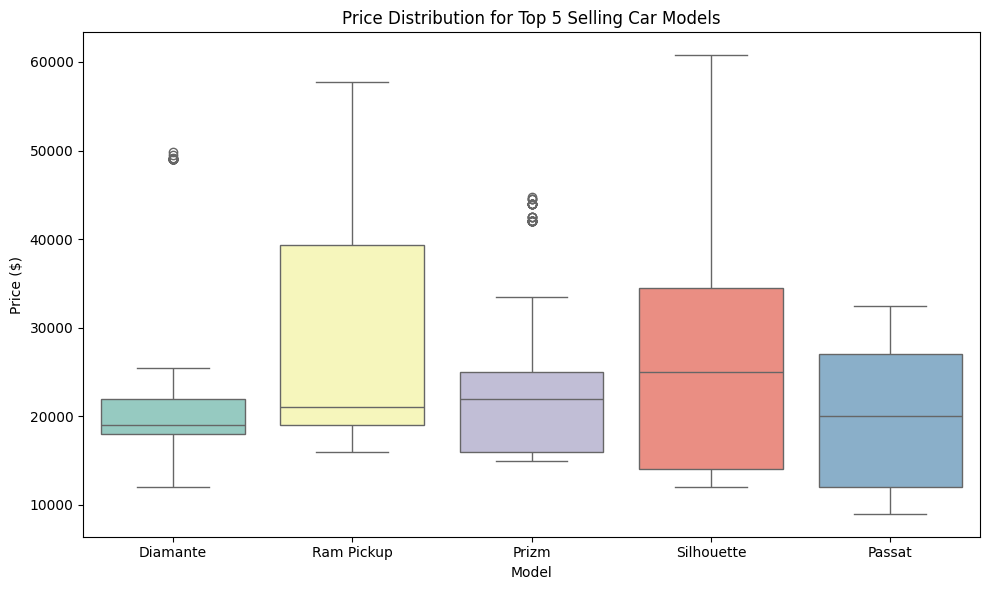

In [19]:
#10. What are the top 5 car models with the highest number of sales, and how does their price distribution look ?
top_models = car_df['Model'].value_counts().nlargest(5).index

plt.figure(figsize=(10, 6))
sns.boxplot(data=car_df[car_df['Model'].isin(top_models)], x='Model', y='Price ($)', palette='Set3')
plt.title('Price Distribution for Top 5 Selling Car Models')
plt.xlabel('Model')
plt.ylabel('Price ($)')
plt.tight_layout()
plt.show()

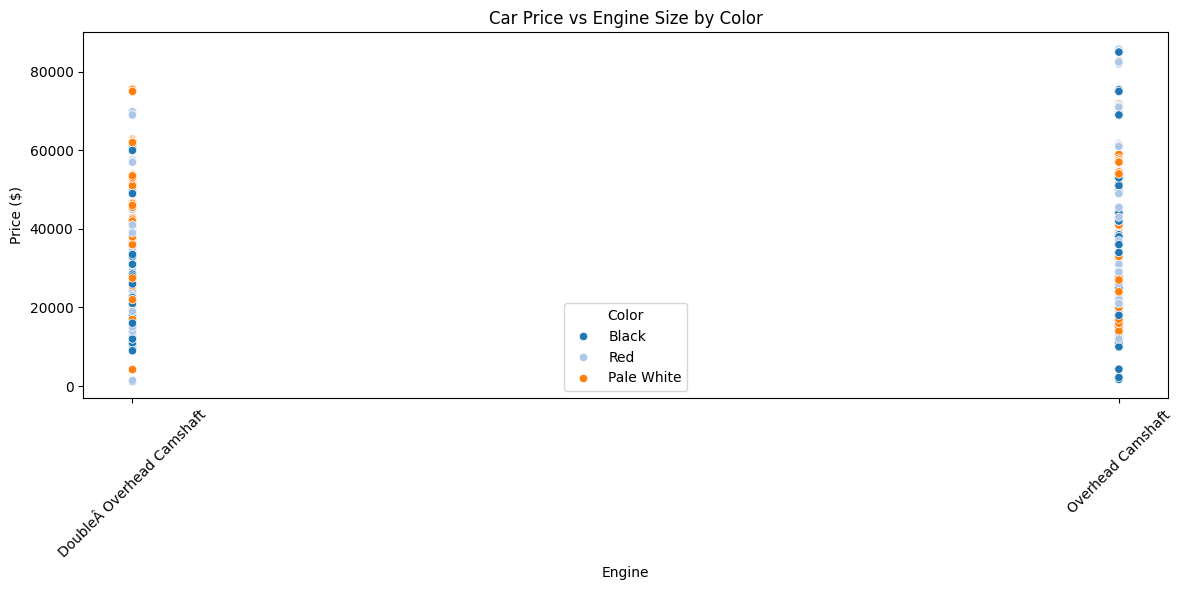

Color-wise price standard deviation:
Color
Red           15519.360962
Black         15286.065976
Pale White    14077.346859
Name: Price ($), dtype: float64


In [20]:
#11. How does car price vary with engine size across different car colors, and which colors have the highest price variation ?
plt.figure(figsize=(12, 6))
sns.scatterplot(data=car_df, x='Engine', y='Price ($)', hue='Color', palette='tab20')
plt.title('Car Price vs Engine Size by Color')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

color_variation = car_df.groupby('Color')['Price ($)'].std().sort_values(ascending=False)
print("Color-wise price standard deviation:")
print(color_variation.head(10))

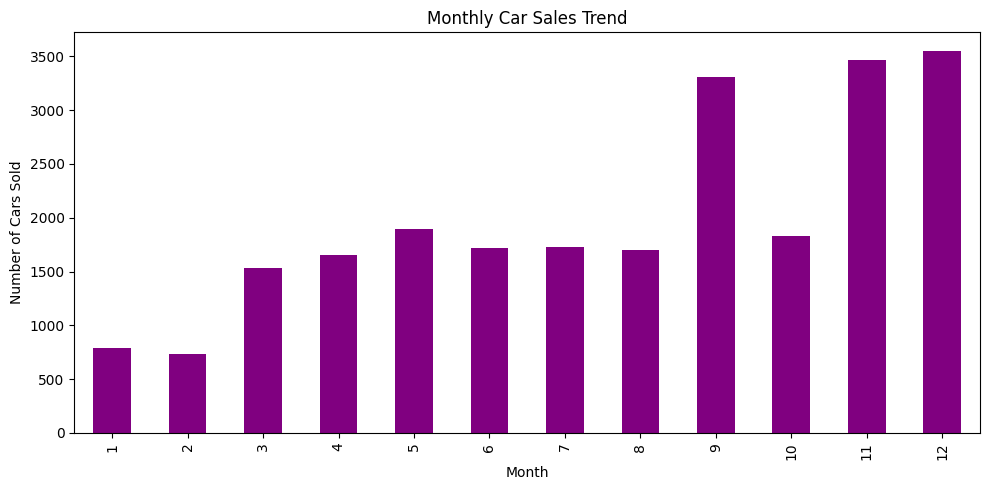

In [21]:
#12. Is there any seasonal trend in car sales based on the date of sale ?
car_df['Date'] = pd.to_datetime(car_df['Date'])
car_df['Month'] = car_df['Date'].dt.month
monthly_sales = car_df['Month'].value_counts().sort_index()

plt.figure(figsize=(10, 5))
monthly_sales.plot(kind='bar', color='purple')
plt.title('Monthly Car Sales Trend')
plt.xlabel('Month')
plt.ylabel('Number of Cars Sold')
plt.tight_layout()
plt.show()

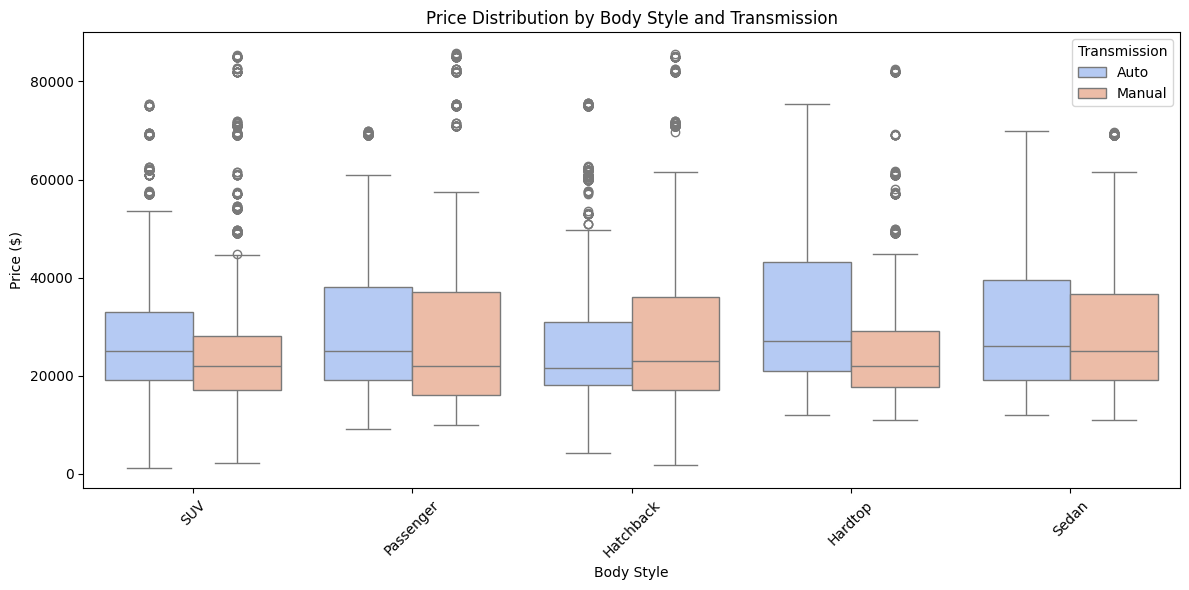

In [22]:
#13. How does the car price distribution change when considering different combinations of body style and transmission type ?
plt.figure(figsize=(12, 6))
sns.boxplot(data=car_df, x='Body Style', y='Price ($)', hue='Transmission', palette='coolwarm')
plt.title('Price Distribution by Body Style and Transmission')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


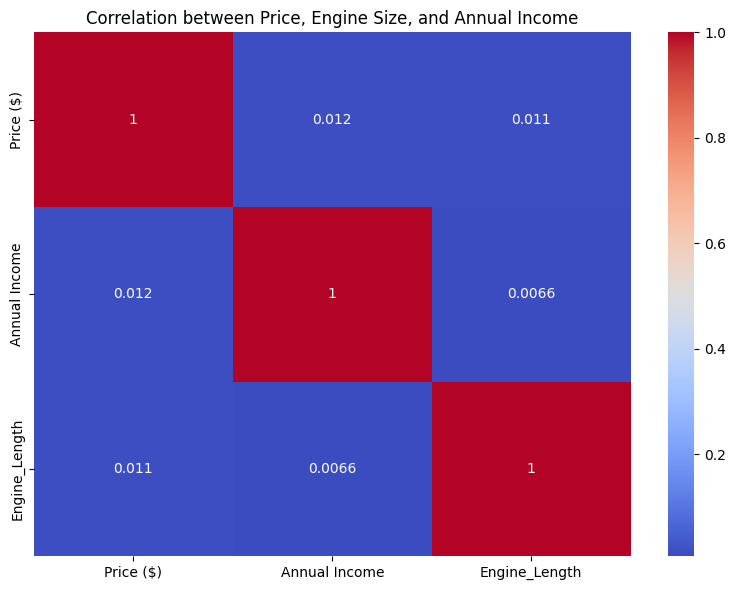

In [23]:
#14. What is the correlation between car price, engine size, and annual income of customers, and how do these features interact ?
correlation_df = car_df[['Price ($)', 'Annual Income']].copy()
correlation_df['Engine_Length'] = car_df['Engine'].astype(str).str.len()

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation between Price, Engine Size, and Annual Income')
plt.tight_layout()
plt.show()


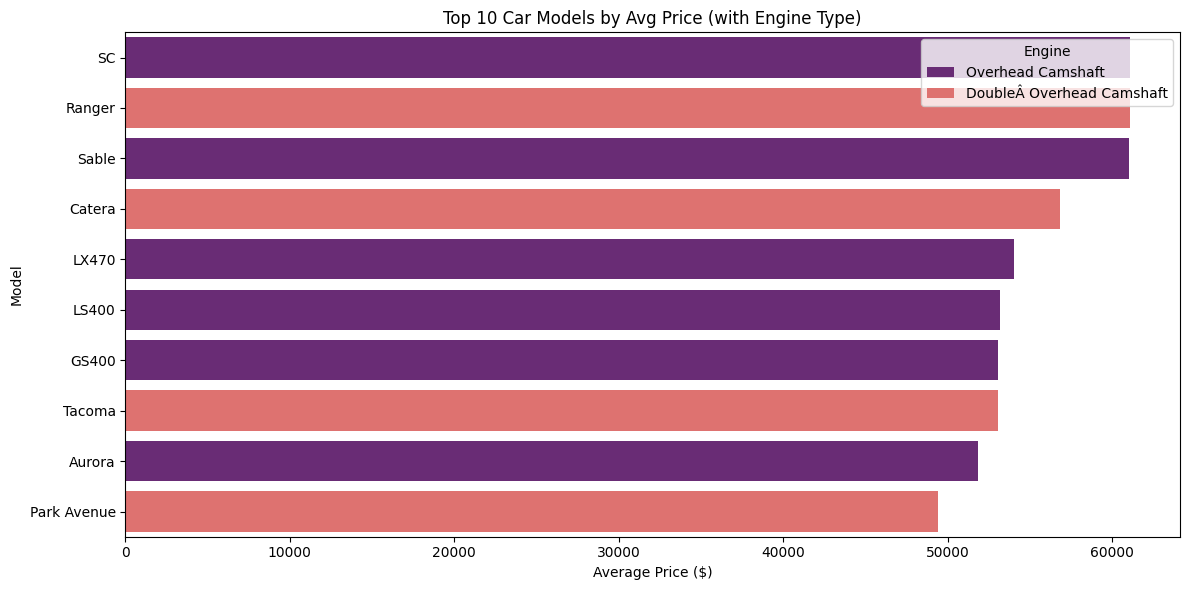

In [25]:
#15. How does the average car price vary across different car models and engine types?
avg_price_model_engine = car_df.groupby(['Model', 'Engine'])['Price ($)'].mean().reset_index()
top_10_combinations = avg_price_model_engine.sort_values(by='Price ($)', ascending=False).head(10)

plt.figure(figsize=(12, 6))
sns.barplot(data=top_10_combinations, x='Price ($)', y='Model', hue='Engine', palette='magma')
plt.title('Top 10 Car Models by Avg Price (with Engine Type)')
plt.xlabel('Average Price ($)')
plt.ylabel('Model')
plt.tight_layout()
plt.show()

#Amazon Sales Data



In [26]:
import pandas as pd
import numpy as np

# Load the dataset
amazon_df = pd.read_csv('/content/amazon (1).csv')


print("Initial preview of dataset:")
print(amazon_df.head())



Initial preview of dataset:
   product_id                                       product_name  \
0  B07JW9H4J1  Wayona Nylon Braided USB to Lightning Fast Cha...   
1  B098NS6PVG  Ambrane Unbreakable 60W / 3A Fast Charging 1.5...   
2  B096MSW6CT  Sounce Fast Phone Charging Cable & Data Sync U...   
3  B08HDJ86NZ  boAt Deuce USB 300 2 in 1 Type-C & Micro USB S...   
4  B08CF3B7N1  Portronics Konnect L 1.2M Fast Charging 3A 8 P...   

                                            category discounted_price  \
0  Computers&Accessories|Accessories&Peripherals|...             ₹399   
1  Computers&Accessories|Accessories&Peripherals|...             ₹199   
2  Computers&Accessories|Accessories&Peripherals|...             ₹199   
3  Computers&Accessories|Accessories&Peripherals|...             ₹329   
4  Computers&Accessories|Accessories&Peripherals|...             ₹154   

  actual_price discount_percentage rating rating_count  \
0       ₹1,099                 64%    4.2       24,269   
1       

In [28]:
#Show basic info about data
print("\nDataset Info:")
print(amazon_df.info())


Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1465 entries, 0 to 1464
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   product_id           1465 non-null   object
 1   product_name         1465 non-null   object
 2   category             1465 non-null   object
 3   discounted_price     1465 non-null   object
 4   actual_price         1465 non-null   object
 5   discount_percentage  1465 non-null   object
 6   rating               1465 non-null   object
 7   rating_count         1463 non-null   object
 8   about_product        1465 non-null   object
 9   user_id              1465 non-null   object
 10  user_name            1465 non-null   object
 11  review_id            1465 non-null   object
 12  review_title         1465 non-null   object
 13  review_content       1465 non-null   object
 14  img_link             1465 non-null   object
 15  product_link         1465 non-null   obj

In [29]:
# Strip and standardize column names
amazon_df.columns = amazon_df.columns.str.strip().str.replace(' ', '_').str.replace('[^a-zA-Z0-9_]', '', regex=True)

In [30]:
# Check for missing values
print("\nMissing values in each column:")
print(amazon_df.isnull().sum())


Missing values in each column:
product_id             0
product_name           0
category               0
discounted_price       0
actual_price           0
discount_percentage    0
rating                 0
rating_count           2
about_product          0
user_id                0
user_name              0
review_id              0
review_title           0
review_content         0
img_link               0
product_link           0
dtype: int64


In [31]:
amazon_df.dropna(inplace=True)

In [32]:
print("\nNumber of duplicate rows:", amazon_df.duplicated().sum())


Number of duplicate rows: 0


In [33]:
print("\nColumn Data Types:")
print(amazon_df.dtypes)


Column Data Types:
product_id             object
product_name           object
category               object
discounted_price       object
actual_price           object
discount_percentage    object
rating                 object
rating_count           object
about_product          object
user_id                object
user_name              object
review_id              object
review_title           object
review_content         object
img_link               object
product_link           object
dtype: object


In [35]:
print("\nFinal shape after cleaning:", amazon_df.shape)


Final shape after cleaning: (1463, 16)


In [36]:
#necessary columns to numeric
amazon_df['discounted_price'] = pd.to_numeric(amazon_df['discounted_price'], errors='coerce')
amazon_df['actual_price'] = pd.to_numeric(amazon_df['actual_price'], errors='coerce')
amazon_df['rating'] = pd.to_numeric(amazon_df['rating'], errors='coerce')
amazon_df['rating_count'] = pd.to_numeric(amazon_df['rating_count'], errors='coerce')

In [37]:
# Drop rows with all NaNs in important columns
amazon_df.dropna(subset=['discounted_price', 'actual_price', 'rating', 'rating_count'], how='all', inplace=True)

Average rating by category:
                                              category  rating
0                        Computers&Accessories|Tablets     4.6
1    Computers&Accessories|NetworkingDevices|Networ...     4.5
2     Electronics|Cameras&Photography|Accessories|Film     4.5
3              Computers&Accessories|Components|Memory     4.5
4    Electronics|HomeAudio|MediaStreamingDevices|St...     4.5
..                                                 ...     ...
206  Computers&Accessories|Accessories&Peripherals|...     3.6
207  Electronics|HomeTheater,TV&Video|Accessories|3...     3.5
208  Computers&Accessories|Accessories&Peripherals|...     3.5
209  Computers&Accessories|Accessories&Peripherals|...     3.4
210  Home&Kitchen|Kitchen&HomeAppliances|Coffee,Tea...     3.3

[211 rows x 2 columns]


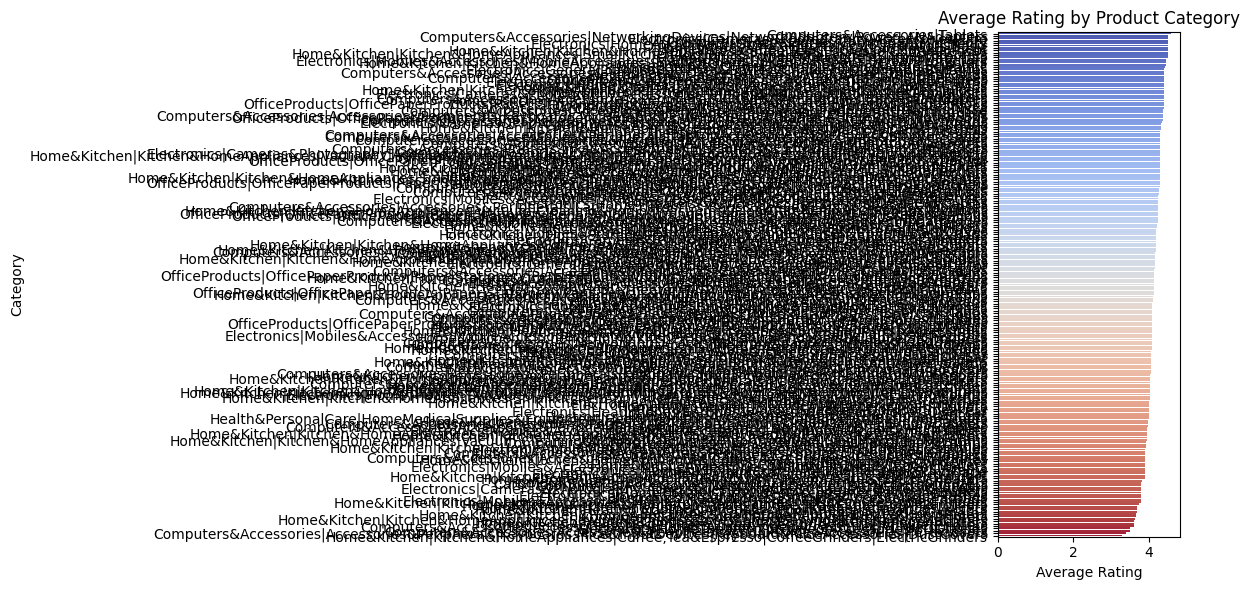

In [51]:
#1. What is the average rating for each product category ?
# 1. Average rating for each product category
rating_data = amazon_df.dropna(subset=['rating', 'category'])

if not rating_data.empty:
    avg_rating_by_category = rating_data.groupby('category')['rating'].mean().sort_values(ascending=False).reset_index()

    print("Average rating by category:")
    print(avg_rating_by_category)

    plt.figure(figsize=(12, 6))
    sns.barplot(data=avg_rating_by_category, x='rating', y='category', palette='coolwarm')
    plt.title('Average Rating by Product Category')
    plt.xlabel('Average Rating')
    plt.ylabel('Category')
    plt.tight_layout()
    plt.show()
else:
    print("⚠️ No valid rating or category data available to analyze.")


In [39]:
#2. What are the top rating_count products by category ?
top_rated_by_category = amazon_df.sort_values('rating_count', ascending=False).groupby('category').head(1)
print("Top rated product by rating count in each category:")
print(top_rated_by_category[['category', 'product_name', 'rating', 'rating_count']])


Top rated product by rating count in each category:
                                               category  \
1279  Home&Kitchen|Kitchen&HomeAppliances|Vacuum,Cle...   
750   Electronics|GeneralPurposeBatteries&BatteryCha...   
1059  Home&Kitchen|Kitchen&HomeAppliances|SmallKitch...   
823   Computers&Accessories|Accessories&Peripherals|...   
1272  Home&Kitchen|Heating,Cooling&AirQuality|WaterH...   
...                                                 ...   
1375  Home&Kitchen|Kitchen&HomeAppliances|Coffee,Tea...   
1399  Home&Kitchen|Kitchen&HomeAppliances|Coffee,Tea...   
1422  Home&Kitchen|Heating,Cooling&AirQuality|Parts&...   
1439  Home&Kitchen|Heating,Cooling&AirQuality|Fans|P...   
1444  Home&Kitchen|Kitchen&HomeAppliances|Vacuum,Cle...   

                                           product_name  rating  rating_count  
1279  Eureka Forbes car Vac 100 Watts Powerful Sucti...     NaN         992.0  
750        Eveready Red 1012 AAA Batteries - Pack of 10     4.3         989.0  

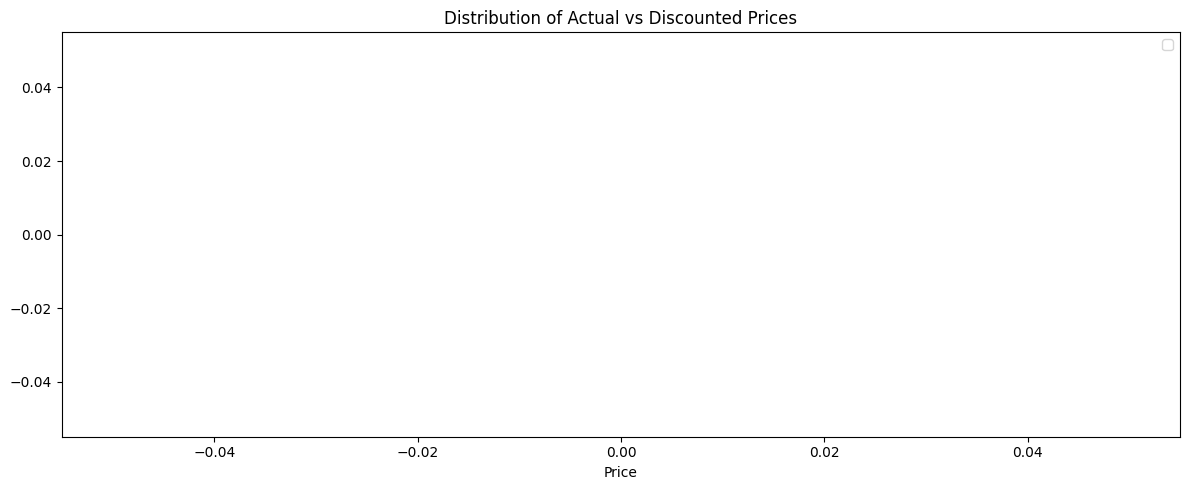

In [52]:
#3. What is the distribution of discounted prices vs. actual prices ?
# 3. Distribution of discounted prices vs. actual prices
valid_prices = amazon_df[['actual_price', 'discounted_price']].dropna()
valid_prices = valid_prices[(valid_prices['actual_price'] > 0) & (valid_prices['discounted_price'] > 0)]

plt.figure(figsize=(12, 5))
sns.kdeplot(valid_prices['actual_price'], label='Actual Price', fill=True)
sns.kdeplot(valid_prices['discounted_price'], label='Discounted Price', fill=True)
plt.title('Distribution of Actual vs Discounted Prices')
plt.xlabel('Price')
plt.legend()
plt.tight_layout()
plt.show()


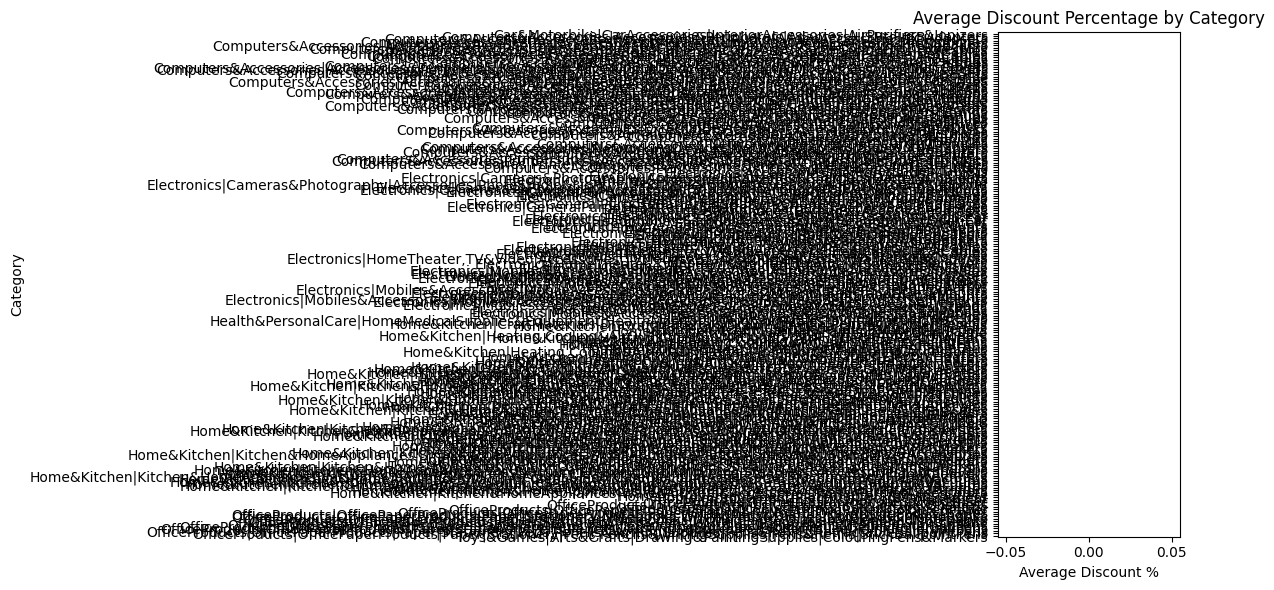

In [41]:
#4. How does the average discount percentage vary across categories ?
amazon_df['discount_pct'] = ((amazon_df['actual_price'] - amazon_df['discounted_price']) / amazon_df['actual_price']) * 100
avg_discount_by_cat = amazon_df.groupby('category')['discount_pct'].mean().sort_values(ascending=False).reset_index()

plt.figure(figsize=(12, 6))
sns.barplot(data=avg_discount_by_cat, x='discount_pct', y='category', palette='viridis')
plt.title('Average Discount Percentage by Category')
plt.xlabel('Average Discount %')
plt.ylabel('Category')
plt.tight_layout()
plt.show()

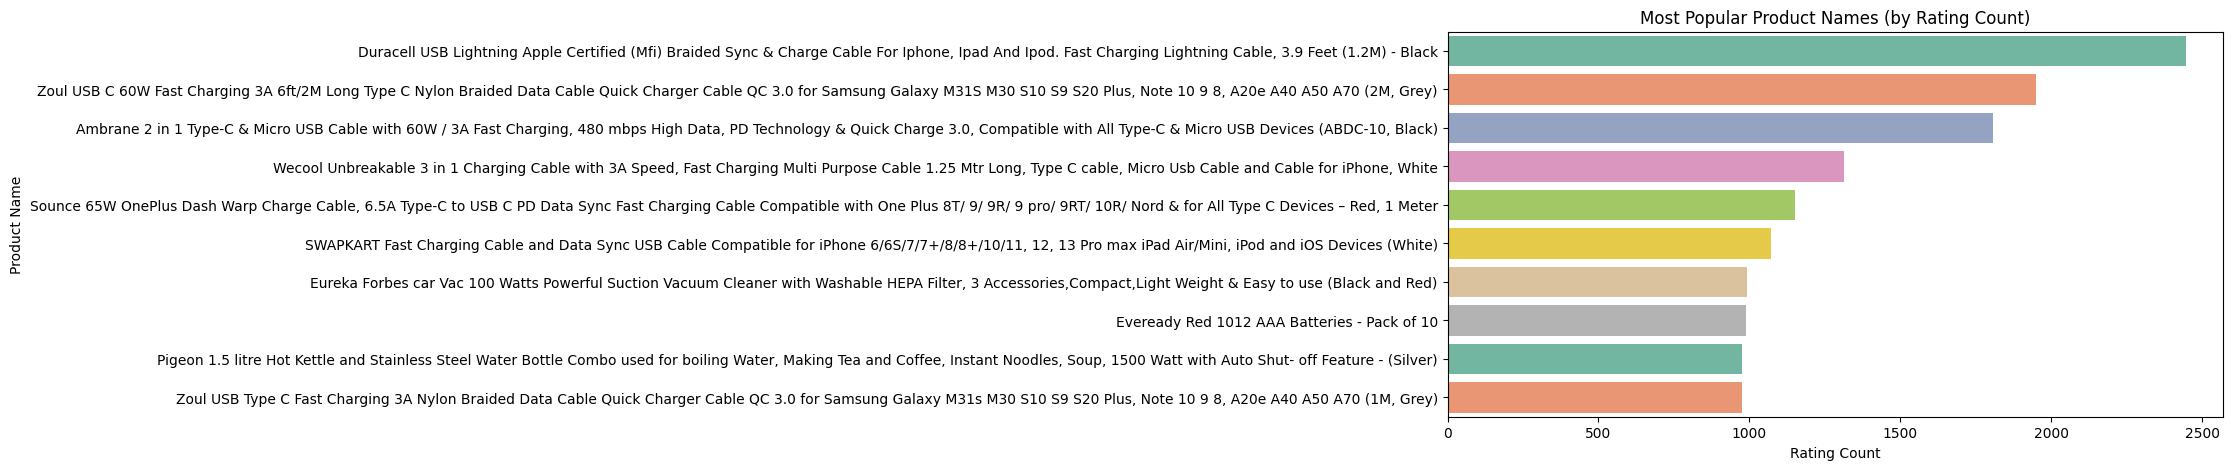

In [42]:
#5. What are the most popular product names ?
popular_products = amazon_df[['product_name', 'rating_count']].dropna()
popular_products = popular_products.groupby('product_name').sum().sort_values(by='rating_count', ascending=False).head(10)

plt.figure(figsize=(10, 5))
sns.barplot(x=popular_products['rating_count'], y=popular_products.index, palette='Set2')
plt.title('Most Popular Product Names (by Rating Count)')
plt.xlabel('Rating Count')
plt.ylabel('Product Name')
plt.tight_layout()
plt.show()

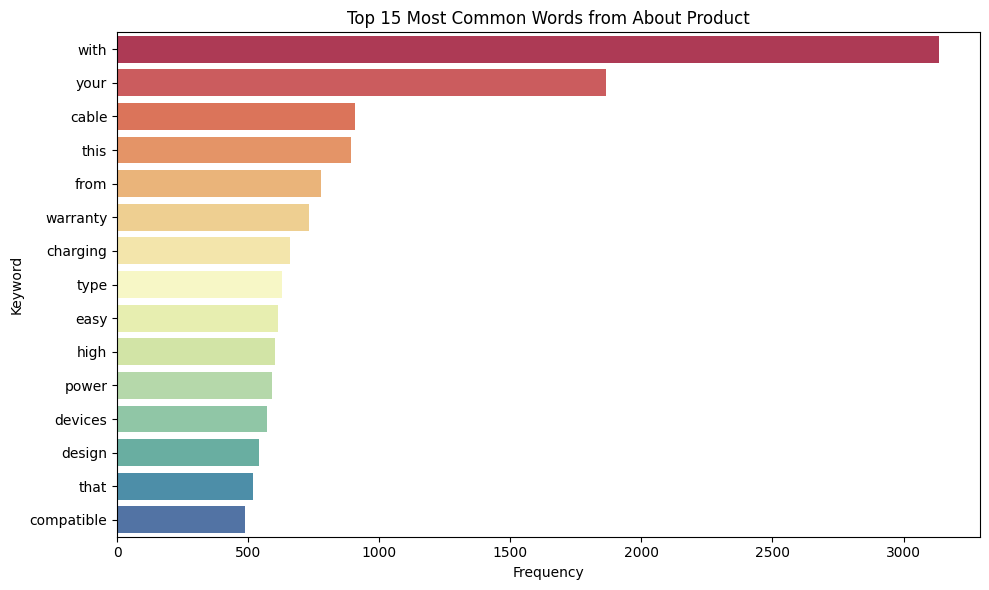

In [57]:
#6. What are the most popular product keywords ?

from collections import Counter
import re

# Drop NaNs and lowercase everything
text_data = amazon_df['about_product'].dropna().str.lower().str.cat(sep=' ')

# Remove punctuation and split into words
words = re.findall(r'\b\w+\b', text_data)

# Filter out very short/common words (optional stopword filtering)
filtered_words = [word for word in words if len(word) > 3]

# Count frequency
word_freq = pd.Series(Counter(filtered_words)).sort_values(ascending=False).head(15)

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(x=word_freq.values, y=word_freq.index, palette='Spectral')
plt.title('Top 15 Most Common Words from About Product')
plt.xlabel('Frequency')
plt.ylabel('Keyword')
plt.tight_layout()
plt.show()





In [59]:
#7. What are the most popular product reviews ?
top_reviews = amazon_df['review_content'].dropna().astype(str).value_counts().head(10)

print("Most common product reviews:")
print(top_reviews)

Most common product reviews:
review_content
I am not big on camera usage, personally. I was even mentally prepared for a bad camera, based on some reviews here. But I was pleasantly surprised that camera clicks good photos. They are not awesome, but they are decent photos that can even be shared.Now coming to my biggest grouse; heating issue. The phone started heating up while charging, but it was just a little and so I could have ignored it. But then it started heating up more and got me very concerned. I even ordered a replacement thinking I got a defective piece. But then, after further tests, I found that it is heating more when I download huge amounts of data, for example, when I restore data of my old phone, from back up. This is ok with me as, I don't perform huge data loads regularly, definitely not on phone. Then I tested by running tasks I usually perform such as checking office mails, attending office meeting on phone, watching a video from Amazon Prime, and so on. The phone

In [62]:
#8. What is the correlation between discounted_price and rating ?
# Filter required columns
corr_df = amazon_df[['discounted_price', 'rating']].dropna()

# Remove outliers using IQR for 'discounted_price'
Q1 = corr_df['discounted_price'].quantile(0.25)
Q3 = corr_df['discounted_price'].quantile(0.75)
IQR = Q3 - Q1

# Define outlier-free range
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter data within bounds
corr_df = corr_df[(corr_df['discounted_price'] >= lower_bound) & (corr_df['discounted_price'] <= upper_bound)]

# Plot correlation
if len(corr_df) > 0:
    corr_val = corr_df.corr().iloc[0, 1]
    print(f"Correlation after removing outliers: {corr_val:.2f}")

    plt.figure(figsize=(10, 6))
    sns.regplot(data=corr_df, x='discounted_price', y='rating', scatter_kws={'alpha': 0.3}, line_kws={'color': 'red'})
    plt.title('Correlation between Discounted Price and Rating (Without Outliers)')
    plt.xlabel('Discounted Price')
    plt.ylabel('Rating')
    plt.ylim(0, 5)
    plt.tight_layout()
    plt.show()
else:
    print("⚠️ No valid data to plot after removing outliers.")



⚠️ No valid data to plot after removing outliers.


In [47]:
#9. What are the Top 5 categories based on the highest ratings ?
top5_rating_categories = avg_rating_by_category.head(5)
print("Top 5 categories by average rating:")
print(top5_rating_categories)


Top 5 categories by average rating:
                                            category  rating
0                      Computers&Accessories|Tablets     4.6
1  Computers&Accessories|NetworkingDevices|Networ...     4.5
2   Electronics|Cameras&Photography|Accessories|Film     4.5
3            Computers&Accessories|Components|Memory     4.5
4  Electronics|HomeAudio|MediaStreamingDevices|St...     4.5


In [48]:
#10. Identify any potential areas for improvement or optimization based on the data analysis.
missing_rating = amazon_df['rating'].isnull().sum()
missing_price = amazon_df['actual_price'].isnull().sum()
print("\n--- Optimization Suggestions ---")
if missing_rating > 0:
    print(f"⚠️  {missing_rating} entries have missing ratings. Improve review collection.")
if missing_price > 0:
    print(f"⚠️  {missing_price} entries have missing actual prices. Ensure all listings have complete pricing.")
if avg_discount_by_cat['discount_pct'].max() > 70:
    print("🔍 High discount percentages detected. Review pricing strategy for over-discounted items.")
if amazon_df.duplicated().sum() > 0:
    print(f"⚠️  {amazon_df.duplicated().sum()} duplicate entries found. Consider deduplication.")
else:
    print("✅ Dataset appears clean and balanced for analysis.")


--- Optimization Suggestions ---
⚠️  1 entries have missing ratings. Improve review collection.
⚠️  1463 entries have missing actual prices. Ensure all listings have complete pricing.
✅ Dataset appears clean and balanced for analysis.


#Spotify Data: Popular Hip-hop Artists and Tracks

In [65]:
import pandas as pd
import numpy as np

spotify_df = pd.read_csv('/content/spotify.csv')


In [66]:
# Standardize column names
spotify_df.columns = spotify_df.columns.str.strip().str.lower().str.replace(' ', '_').str.replace('[^a-z0-9_]', '', regex=True)

In [67]:
# Quick overview
print(spotify_df.head())
print(spotify_df.shape)

  artist                               track_name  popularity  duration_ms  \
0  Drake  Rich Baby Daddy (feat. Sexyy Red & SZA)          92       319191   
1  Drake                                One Dance          91       173986   
2  Drake                       IDGAF (feat. Yeat)          90       260111   
3  Drake     First Person Shooter (feat. J. Cole)          88       247444   
4  Drake            Jimmy Cooks (feat. 21 Savage)          88       218364   

                 track_id  
0  1yeB8MUNeLo9Ek1UEpsyz6  
1  1zi7xx7UVEFkmKfv06H8x0  
2  2YSzYUF3jWqb9YP9VXmpjE  
3  7aqfrAY2p9BUSiupwk3svU  
4  3F5CgOj3wFlRv51JsHbxhe  
(440, 5)


In [68]:

# Data types and missing values
print(spotify_df.info())
print(spotify_df.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   artist       440 non-null    object
 1   track_name   440 non-null    object
 2   popularity   440 non-null    int64 
 3   duration_ms  440 non-null    int64 
 4   track_id     440 non-null    object
dtypes: int64(2), object(3)
memory usage: 17.3+ KB
None
artist         0
track_name     0
popularity     0
duration_ms    0
track_id       0
dtype: int64


In [69]:
# Remove duplicates
spotify_df.drop_duplicates(inplace=True)

In [70]:
# Convert duration from milliseconds to minutes if present
if 'duration_ms' in spotify_df.columns:
    spotify_df['duration_min'] = spotify_df['duration_ms'] / 60000

In [71]:
# Fill missing numeric columns with median
numeric_cols = spotify_df.select_dtypes(include=np.number).columns
spotify_df[numeric_cols] = spotify_df[numeric_cols].fillna(spotify_df[numeric_cols].median())

In [72]:
print(spotify_df.info())

<class 'pandas.core.frame.DataFrame'>
Index: 413 entries, 0 to 438
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   artist        413 non-null    object 
 1   track_name    413 non-null    object 
 2   popularity    413 non-null    int64  
 3   duration_ms   413 non-null    int64  
 4   track_id      413 non-null    object 
 5   duration_min  413 non-null    float64
dtypes: float64(1), int64(2), object(3)
memory usage: 22.6+ KB
None


In [77]:
#1. Read the dataframe, check null value if present then do the needful, check duplicate row , if present then do the needful ?
import pandas as pd

# Read the dataset
spotify_df = pd.read_csv('/content/spotify.csv')

# Preview the dataset
print("🔍 First few rows of the dataset:")
print(spotify_df.head())

# Check the shape
print("\n📊 Initial shape of dataset:", spotify_df.shape)

# Check for missing values
print("\n🧼 Missing values in each column:")
print(spotify_df.isnull().sum())

# Drop fully empty rows (if any)
spotify_df.dropna(how='all', inplace=True)

# Drop rows where Artist or Track Name is missing
spotify_df.dropna(subset=['Artist', 'Track Name'], inplace=True)

# Check and drop duplicates
duplicate_count = spotify_df.duplicated().sum()
print(f"\n📌 Duplicate rows found: {duplicate_count}")

spotify_df.drop_duplicates(inplace=True)

# Final shape after cleaning
print("\n✅ Final shape after cleaning:", spotify_df.shape)


🔍 First few rows of the dataset:
  Artist                               Track Name  Popularity  Duration (ms)  \
0  Drake  Rich Baby Daddy (feat. Sexyy Red & SZA)          92         319191   
1  Drake                                One Dance          91         173986   
2  Drake                       IDGAF (feat. Yeat)          90         260111   
3  Drake     First Person Shooter (feat. J. Cole)          88         247444   
4  Drake            Jimmy Cooks (feat. 21 Savage)          88         218364   

                 Track ID  
0  1yeB8MUNeLo9Ek1UEpsyz6  
1  1zi7xx7UVEFkmKfv06H8x0  
2  2YSzYUF3jWqb9YP9VXmpjE  
3  7aqfrAY2p9BUSiupwk3svU  
4  3F5CgOj3wFlRv51JsHbxhe  

📊 Initial shape of dataset: (440, 5)

🧼 Missing values in each column:
Artist           0
Track Name       0
Popularity       0
Duration (ms)    0
Track ID         0
dtype: int64

📌 Duplicate rows found: 27

✅ Final shape after cleaning: (413, 5)


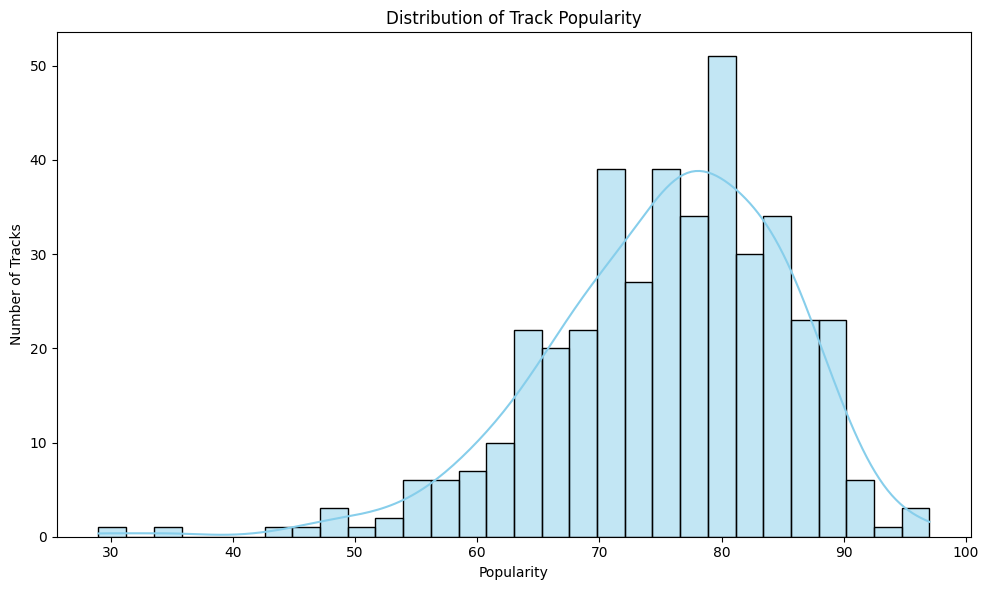

In [78]:
#2.What is the distribution of popularity among the tracks in the dataset? Visualize it using a histogram
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.histplot(data=spotify_df, x='Popularity', bins=30, kde=True, color='skyblue')
plt.title('Distribution of Track Popularity')
plt.xlabel('Popularity')
plt.ylabel('Number of Tracks')
plt.tight_layout()
plt.show()



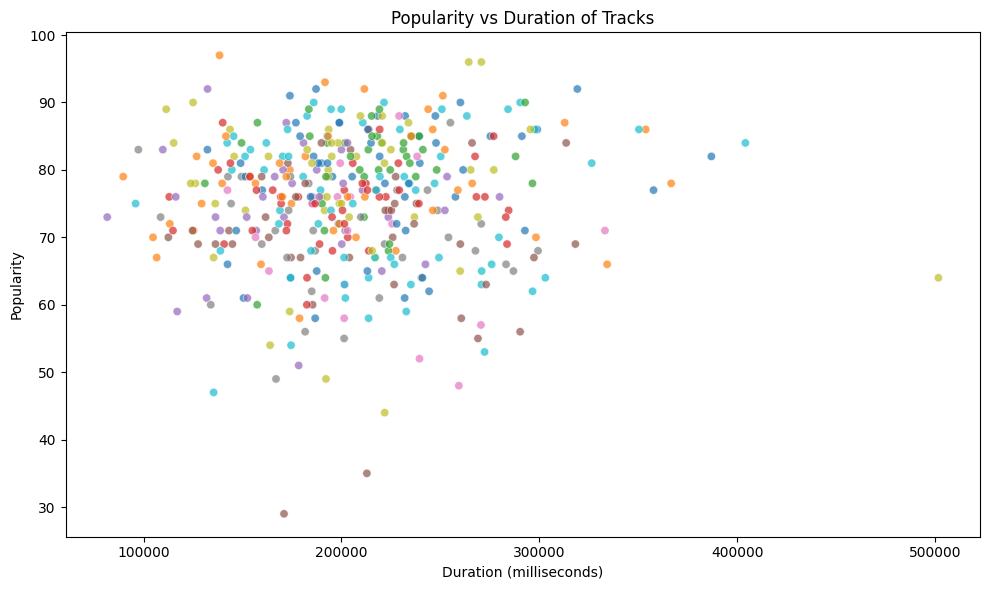

In [79]:
#3. Is there any relationship between the popularity and the duration of tracks? Explore this using a scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(data=spotify_df, x='Duration (ms)', y='Popularity', hue='Artist', palette='tab10', alpha=0.7)
plt.title('Popularity vs Duration of Tracks')
plt.xlabel('Duration (milliseconds)')
plt.ylabel('Popularity')
plt.legend([],[], frameon=False)  # hide legend if too many artists
plt.tight_layout()
plt.show()


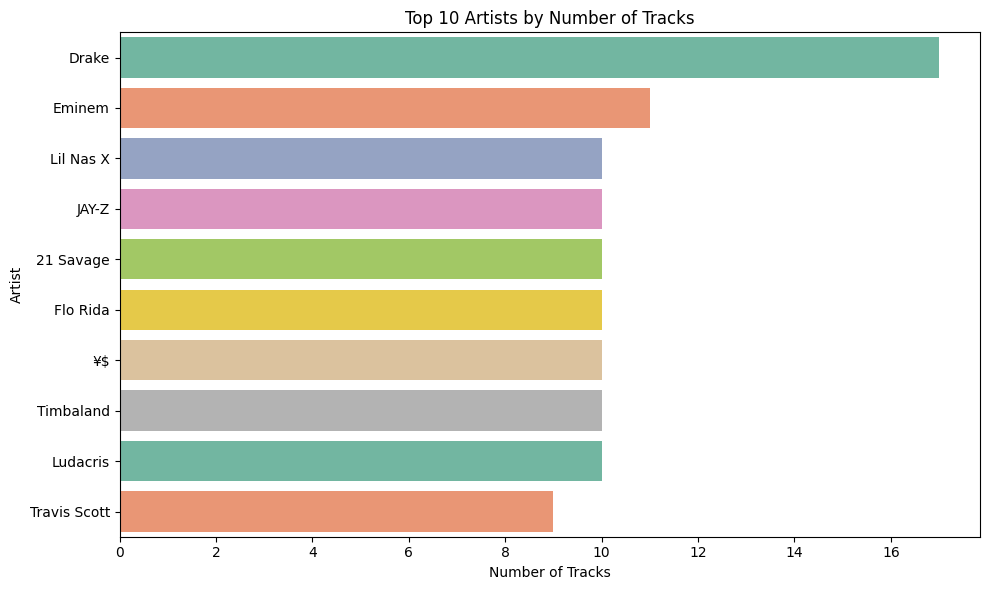

In [80]:
#4. Which artist has the highest number of tracks in the dataset?Display the count of tracks for each artist using a countplot
# Count the number of tracks per artist
artist_counts = spotify_df['Artist'].value_counts().head(10)

plt.figure(figsize=(10, 6))
sns.barplot(x=artist_counts.values, y=artist_counts.index, palette='Set2')
plt.title('Top 10 Artists by Number of Tracks')
plt.xlabel('Number of Tracks')
plt.ylabel('Artist')
plt.tight_layout()
plt.show()

In [82]:
#5. What are the top 5 least popular tracks in the dataset? Provide the artist name and track name for each.
# Get the 5 tracks with the lowest popularity
least_popular_tracks = spotify_df.sort_values(by='Popularity').head(5)

# Display artist and track name (correct column name)
print("Top 5 Least Popular Tracks:")
print(least_popular_tracks[['Artist', 'Track Name', 'Popularity']])


Top 5 Least Popular Tracks:
             Artist                     Track Name  Popularity
207          Pressa  Attachments (feat. Coi Leray)          29
231   Justin Bieber                     Intentions          35
413  French Montana                Splash Brothers          44
225        Lil Baby                  On Me - Remix          47
407     Wyclef Jean      911 (feat. Mary J. Blige)          48


In [83]:
#6. Among the top 5 most popular artists, which artist has the highest popularity on average? Calculate and display the average popularity for each artist.
# Step 1: Get top 5 artists with the most tracks
top_5_artists = spotify_df['Artist'].value_counts().head(5).index.tolist()

# Step 2: Filter the dataset for only those top 5 artists
top_artist_df = spotify_df[spotify_df['Artist'].isin(top_5_artists)]

# Step 3: Group by artist and calculate average popularity
avg_popularity = top_artist_df.groupby('Artist')['Popularity'].mean().sort_values(ascending=False)

# Display the results
print("Average Popularity of Top 5 Most Frequent Artists:")
print(avg_popularity)


Average Popularity of Top 5 Most Frequent Artists:
Artist
21 Savage    83.800000
Eminem       83.636364
Drake        82.882353
JAY-Z        77.900000
Lil Nas X    75.900000
Name: Popularity, dtype: float64


In [84]:
#7. For the top 5 most popular artists, what are their most popular tracks? List the track name for each artist.
# Get the same top 5 artists as before (most frequent)
top_5_artists = spotify_df['Artist'].value_counts().head(5).index.tolist()

# Filter the dataset for those artists
top_artist_df = spotify_df[spotify_df['Artist'].isin(top_5_artists)]

# For each artist, get the most popular track
most_popular_tracks = top_artist_df.loc[top_artist_df.groupby('Artist')['Popularity'].idxmax()][['Artist', 'Track Name', 'Popularity']]

# Display results
print("Most Popular Track for Each of the Top 5 Artists:")
print(most_popular_tracks)


Most Popular Track for Each of the Top 5 Artists:
        Artist                               Track Name  Popularity
70   21 Savage                                   redrum          96
0        Drake  Rich Baby Daddy (feat. Sexyy Red & SZA)          92
80      Eminem                               Without Me          90
100      JAY-Z                          Ni**as In Paris          86
312  Lil Nas X                        THATS WHAT I WANT          81


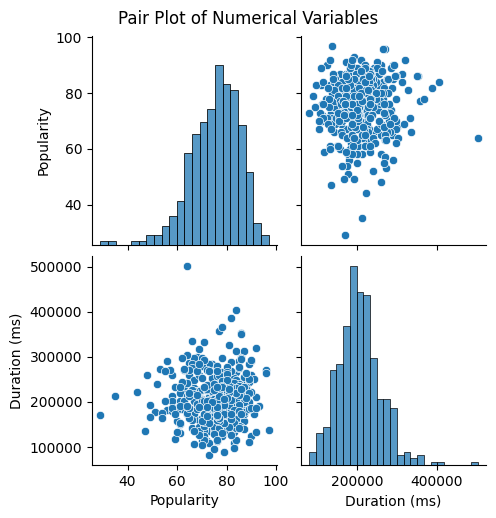

In [85]:
#8 Visualize relationships between multiple numerical variables simultaneously using a pair plot.
import seaborn as sns
import matplotlib.pyplot as plt

# Select relevant numeric columns
numeric_cols = ['Popularity', 'Duration (ms)']

# Create pair plot
sns.pairplot(spotify_df[numeric_cols])
plt.suptitle('Pair Plot of Numerical Variables', y=1.02)
plt.show()


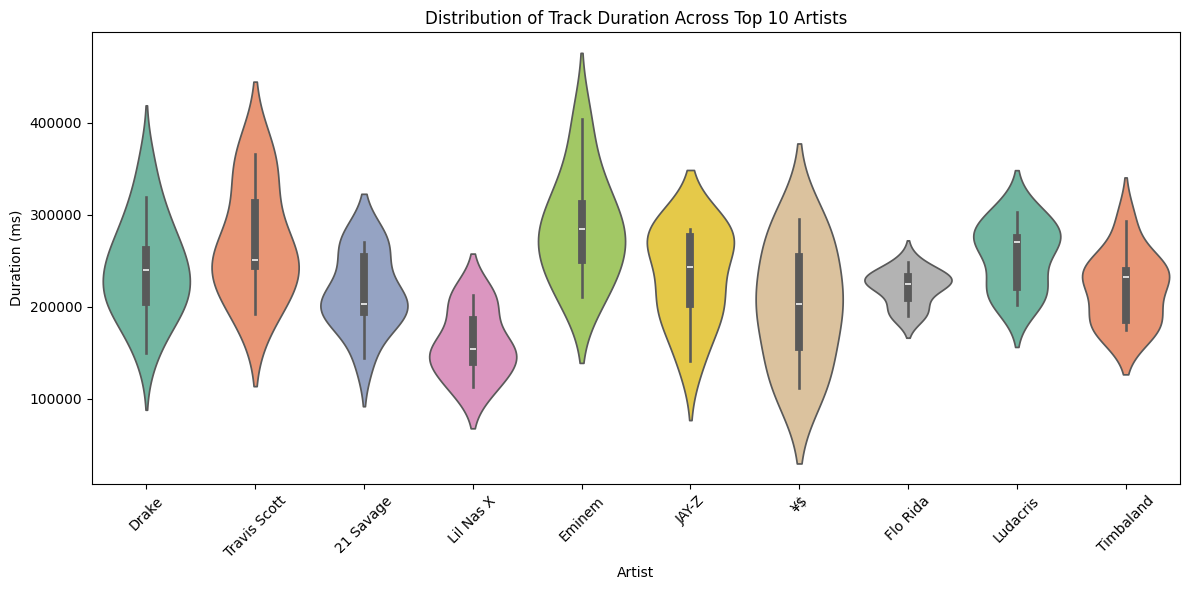

In [86]:
#9. Does the duration of tracks vary significantly across different artists? Explore this visually using a box plot or violin plot.
# Find top 10 artists with the most tracks
top_artists = spotify_df['Artist'].value_counts().head(10).index

# Filter the dataframe
filtered_df = spotify_df[spotify_df['Artist'].isin(top_artists)]

# Plot violin plot
plt.figure(figsize=(12, 6))
sns.violinplot(data=filtered_df, x='Artist', y='Duration (ms)', palette='Set2')
plt.xticks(rotation=45)
plt.title('Distribution of Track Duration Across Top 10 Artists')
plt.ylabel('Duration (ms)')
plt.xlabel('Artist')
plt.tight_layout()
plt.show()


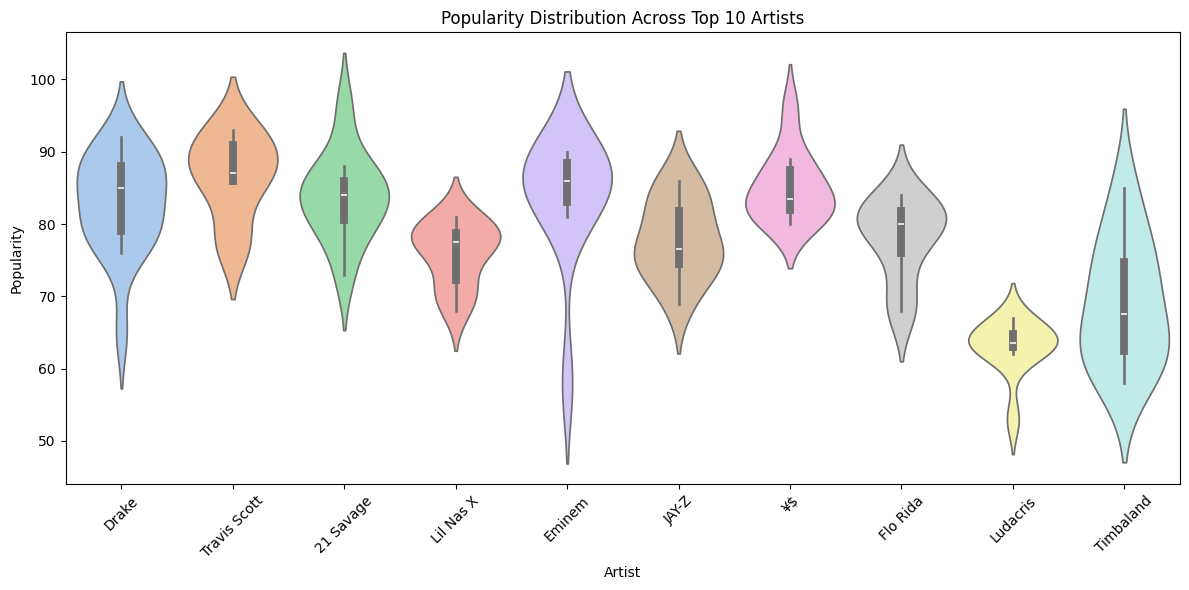

In [87]:
#10. How does the distribution of track popularity vary for different artists? Visualize this using a swarm plot or a violin plot.
# Top 10 artists by track count
top_artists = spotify_df['Artist'].value_counts().head(10).index

# Filter the dataset
filtered_df = spotify_df[spotify_df['Artist'].isin(top_artists)]

# Plot violin plot for popularity distribution
plt.figure(figsize=(12, 6))
sns.violinplot(data=filtered_df, x='Artist', y='Popularity', palette='pastel')
plt.title('Popularity Distribution Across Top 10 Artists')
plt.xticks(rotation=45)
plt.xlabel('Artist')
plt.ylabel('Popularity')
plt.tight_layout()
plt.show()
